In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib','inline')
import seaborn as sns
import re
import pickle

In [2]:
train_df=pd.read_csv('Data/train.csv')
test_df=pd.read_csv('Data/test.csv')

In [3]:
cols_target=['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [4]:
print(test_df.isnull().any())

id              False
comment_text    False
dtype: bool


<AxesSubplot:title={'center':'Correlation of features & targets'}>

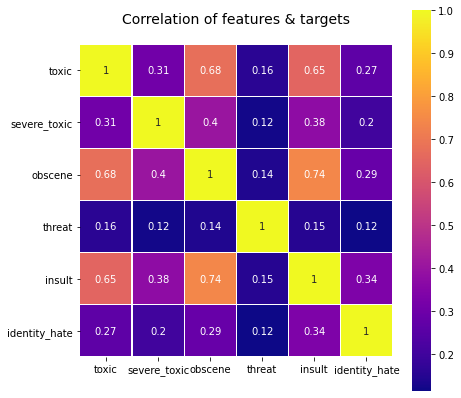

In [5]:
data=train_df[cols_target]
colormap=plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)


In [6]:
def clean_text(text):
    text=text.lower()
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"\'s"," ",text)
    text=re.sub(r"\'ve'","have",text)
    text=re.sub(r"can't","cannot",text)
    text=re.sub(r"n't","not",text)
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"\'re'","are",text)
    text=re.sub(r"\'d","would",text)
    text=re.sub(r"\'ll","will",text)
    text=re.sub(r"\'scuse","excuse",text)
    text=re.sub('\W',' ',text)
    text=re.sub('\s+',' ',text)
    text=text.strip(' ')
    return text
    
    

In [7]:
train_df['comment_text']=train_df['comment_text'].map(lambda com :clean_text(com))
test_df['comment_text']=test_df['comment_text'].map(lambda com :clean_text(com))

In [8]:
train_text=train_df['comment_text']
test_text=test_df['comment_text']
all_text=pd.concat([train_text,test_text])

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
word_vect=CountVectorizer(strip_accents='unicode',
                         analyzer='word',
                         token_pattern=r'\w{1,}',
                         stop_words='english',
                         ngram_range=(1,1)
                         )

In [10]:
word_vect.fit(all_text)
train_features=word_vect.transform(train_text)
test_features=word_vect.transform(test_text)
pickle.dump(word_vect.vocabulary_,open('word_feats.pkl','wb'))

# Model building

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=12.0)

submission_binary = pd.read_csv('sample_submission.csv')

mapper = {}
for label in cols_target:
    mapper[label] = logreg
    filename = str(label+'_model.sav')
    print(filename)
    print('...Processing {}'.format(label))
    y = train_df[label]
    mapper[label].fit(train_features,y)
    pickle.dump(mapper[label],open(filename,'wb'))
    y_pred_X=mapper[label].predict(train_features)
    print('Training accuracy is {}'.format(accuracy_score(y,y_pred_X)))
    test_y_prob = mapper[label].predict_proba(test_features)[:,1]
    submission_binary[label] = test_y_prob

toxic_model.sav
...Processing toxic


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9812246586159139
severe_toxic_model.sav
...Processing severe_toxic


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9923106328844213
obscene_model.sav
...Processing obscene


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9843517932456398
threat_model.sav
...Processing threat


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9985837025524688
insult_model.sav
...Processing insult


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9748826541163494
identity_hate_model.sav
...Processing identity_hate
Training accuracy is 0.9933885229772327


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
submission_binary.to_csv('submission_binary.csv',index=False)